(332, 500, 3)


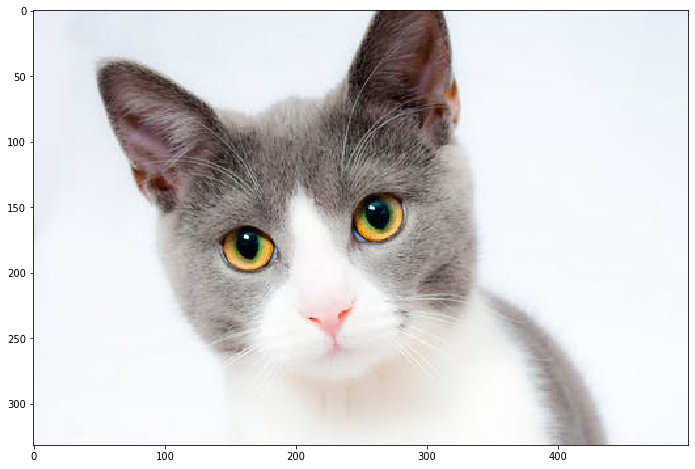

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load image
image_raw = plt.imread("cat.jpeg")
print(image_raw.shape)
# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)


(332, 500)
1.0


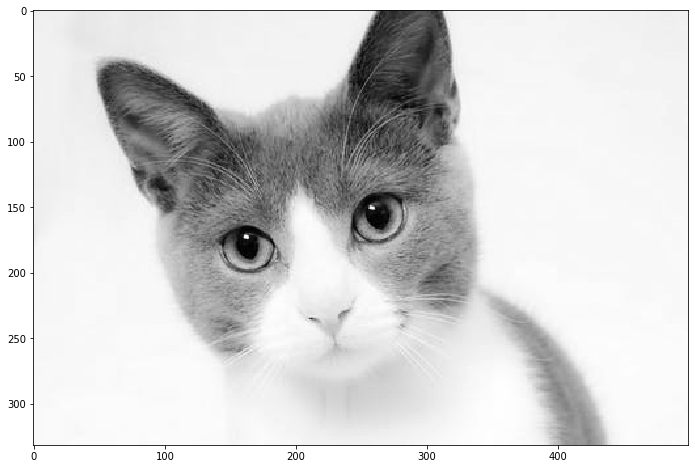

In [2]:
# Converting to greyscale
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_original = image_sum/image_sum.max()
print(image_original.max())

plt.figure(figsize=[12,8])
plt.imshow(image_original, cmap=plt.cm.gray)


Number of components explaining 98% variance: 24


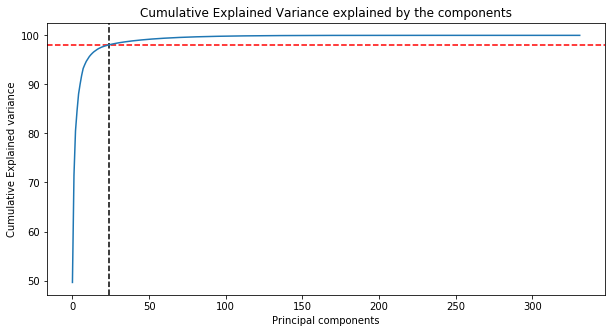

In [3]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_original)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 98% of the variance?
k = np.argmax(var_cumu>98)
print("Number of components explaining 98% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=98, color="r", linestyle="--")
ax = plt.plot(var_cumu)

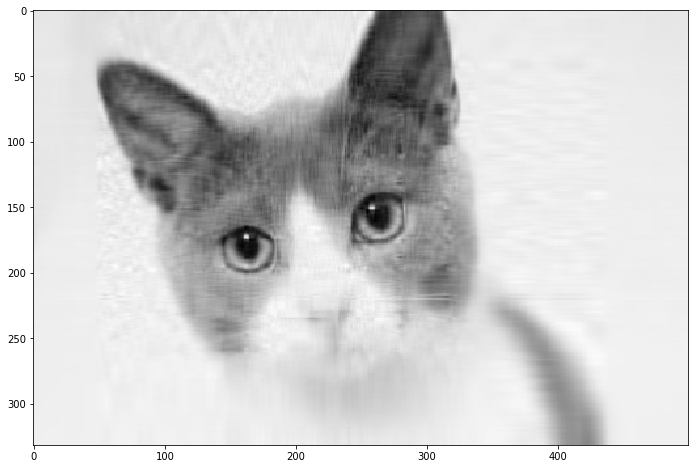

In [4]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_original))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)
